 <table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="cancer.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=24px>
                    <b>Predicting whether the cancer is Benign or Malignant
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

## Problem Statement:
The objective of the dataset is to predict whether Predict whether the cancer is benign or malignant

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.



## Data Definition:

Input variables:

1) **id** (id number)


2) **radius_mean:** mean of distances from center to points on the perimeter


3) **texture_mean:** standard deviation of gray-scale values


4) **perimeter_mean:** mean size of the core tumor


5) **area_mean:** has housing loan? (categorical: 'no','yes','unknown')


6) **smoothness_mean:** mean of local variation in radius lengths


7) **compactness_mean:** mean of perimeter^2 / area - 1.0


8) **concavity_mean:** mean of severity of concave portions of the contour


9) **concave points_mean:** mean for number of concave portions of the contour


10) **symmetry_mean:** 


11) **fractal_dimension_mean:** mean for "coastline approximation" - 1



12) **radius_se:** standard error for the mean of distances from center to points on the perimeter


13) **texture_se:** standard error for standard deviation of gray-scale values


14) **perimeter_se:** 


15) **area_se:**


16) **smoothness_se:** standard error for local variation in radius lengths


17) **compactness_se:** standard error for perimeter^2 / area - 1.0


18) **concavity_se:** standard error for severity of concave portions of the contour


19) **concave points_se:** standard error for number of concave portions of the contour


20) **symmetry_se:** 


21) **fractal_dimension_se:** standard error for "coastline approximation" - 1


22) **radius_worst:** "worst" or largest mean value for mean of distances from center to points on the perimeter


23) **texture_worst:** "worst" or largest mean value for standard deviation of gray-scale values


24) **perimeter_worst:**


25) **area_worst:** 


26) **smoothness_worst:** "worst" or largest mean value for local variation in radius lengths


27) **compactness_worst:** "worst" or largest mean value for perimeter^2 / area - 1.0


28) **concavity_worst:** "worst" or largest mean value for severity of concave portions of the contour


29) **concave points_worst:** "worst" or largest mean value for number of concave portions of the contour


30) **symmetry_worst:** 


31) **fractal_dimension_worst:** "worst" or largest mean value for "coastline approximation" - 1


Output variable (desired target):

32) **diagnosis:**  The diagnosis of breast tissues (M = malignant, B = benign)


## Table of Contents

1. **[Import Packages](#import_packages)**
2. **[Read Data](#Read_Data)**
3. **[Understand and Prepare the Data](#data_preparation)**
    - 3.1 - [Data Types and Dimensions](#Data_Types)
    - 3.2 - [Statistical Summary](#Statistical_Summary)
    - 3.3 - [Visualization](#Visualization)
    - 3.4 - [Label Encoding for Target Variable](#Label_Encoding_for_Target_Variable)
    - 3.6 - [Missing Data Treatment](#Missing_Data_Treatment)
    - 3.7 - [Correlation](#Correlation)
    - 3.8 - [Feature Selection](#feature_selection) 
4. **[Ensemble Learning Techniques](#Ensemble_learning)**
    - 4.1 - [Bagging meta-estimator](#meta_estimator)
    - 4.2 - [AdaBoost](#AdaBoost)
    - 4.3 - [XGBM](#XGBM)
5. **[Model Comparision](#model_cmp)**  
    
  

<a id='import_packages'></a>
## 1. Import Packages

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Set default setting of seaborn
sns.set()

# suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

<a id='Read_Data'></a>
## 2. Read the Data

<table align="left">
    <tr>
        <td width="8%">
            <img src="key.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b>Read the data using read_csv() function from pandas<br> 
                </font>
            </div>
        </td>
    </tr>
</table>

In [96]:
# read the data
raw_data = pd.read_csv(r'../Dataset/cancer.csv')

# print the first five rows of the data
raw_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


<a id='data_preparation'></a>
## 3. Understand and Prepare the Data

<table align="left">
    <tr>
        <td width="8%">
            <img src="key.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b>The process of data preparation entails cleansing, structuring and integrating data to make it ready for analysis. <br><br>
                        Here we will analyze and prepare data :<br>
                        1. Check dimensions and data types of the dataframe <br>
                        2. Study summary statistics<br> 
                        3. Check for missing values<br>
                        4. Study correlation<br>
                                       </b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='Data_Types'></a>
## 3.1 Data Types and Dimensions

In [97]:
# check the data types for variables
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

<table align='left'>
    <tr>
        <td width='8%'>
            <img src='note.png'>
        </td>
        <td>
            <div align='left', style='font-size:120%'>
                    <b>From the above output, we see that <br>
                        1. There is an id that cannot be used for classificaiton <br>
                        2. Diagnosis is our class label<br>
                        3. Unnamed: 32 feature includes NaN so we do not need it<br>
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

**Removing 'id' and 'Unnamed:32' feature from dataset**

In [98]:
data = raw_data.drop(['id','Unnamed: 32'],axis= 1)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [99]:
# get the shape
print(data.shape)

(569, 31)


**We see the dataframe has 31 columns and 569 observations**

<table align='left'>
    <tr>
        <td width='8%'>
            <img src='note.png'>
        </td>
        <td>
            <div align='left', style='font-size:120%'>
                    <b>We check the class distribution of the target variable<br>
                    </br></b>
                </font>
            </div>
        </td>
    </tr>
</table>

Number of Benign:  357
Number of Malignant :  212


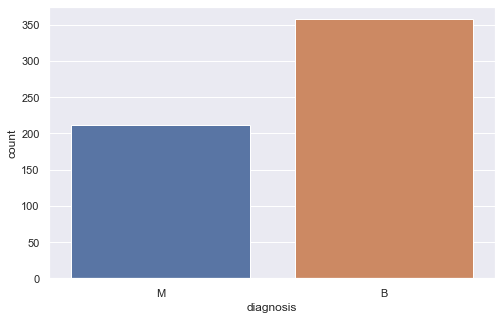

In [100]:
ax = sns.countplot(data['diagnosis'],label="Count")       # M = 212, B = 357
B, M = data['diagnosis'].value_counts()
print('Number of Benign: ',B)
print('Number of Malignant : ',M)

#### We see that the data is imbalanced

<a id='Statistical_Summary'></a>
## 3.2 Statistical Summary
Here we take a look at the summary of each attribute. This includes the count, mean, the min and max values as well as some percentiles for numeric variables.

<table align="left">
    <tr>
        <td width="8%">
            <img src="key.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b> In our dataset we have numerical variables. Now we check for summary statistics of all the variables<br>
                        For numerical variables, we use .describe(). For categorical variables we use describe(include='object').
          <br>
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [101]:
# data frame with numerical features
data.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


<table align="left">
    <tr>
        <td width="8%">
            <img src="note.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
<b>The above output illustrates the summary statistics of all the numeric variables like the mean, median(50%), minimum, and maximum values, along with the standard deviation.</b>     </font>
            </div>
        </td>
    </tr>
</table>

In [102]:
# data frame with categorical features
data.describe(include='object').T

,count,unique,top,freq
diagnosis,569,2,B,357


<table align="left">
    <tr>
        <td width="8%">
            <img src="note.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
<b>The above output illustrates the summary statistics of the categorical variables i.e diagnosis(no.of levels in the variable), top(majority level) and the count of the majority level.</b>     </font>
            </div>
        </td>
    </tr>
</table>

<a id='Label_Encoding_for_Target_Variable'></a>
## 3.3. Label Encoding for Target Variable
Converting target categorical variable into numeric

In [103]:
# replace 'M' with zero
data['diagnosis'] = data['diagnosis'].replace('M', 0)
# replace 'B' with one
data['diagnosis'] = data['diagnosis'].replace('B', 1)

data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [104]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
diagnosis,569.0,0.627417,0.483918,0.000000,0.000000,1.000000,1.000000,1.00000
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400


<a id='Missing_Data_Treatment'></a>
## 3.4. Missing Data Treatment
If the missing values are not handled properly we may end up drawing an inaccurate inference about the data. Due to improper handling, the result obtained will differ from the ones where the missing values are present.

<table align="left">
    <tr>
        <td width="8%">
            <img src="key.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b>In order to get the count of missing values in each column, we use the in-built function .isnull().sum()
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [105]:
# get the count of missing values
missing_values = data.isnull().sum()

# print the count of missing values
print(missing_values)

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


There are no missing values present in the data.

<a id='Visualization'></a>
## 3.6. Visualization


**PDF's of features**

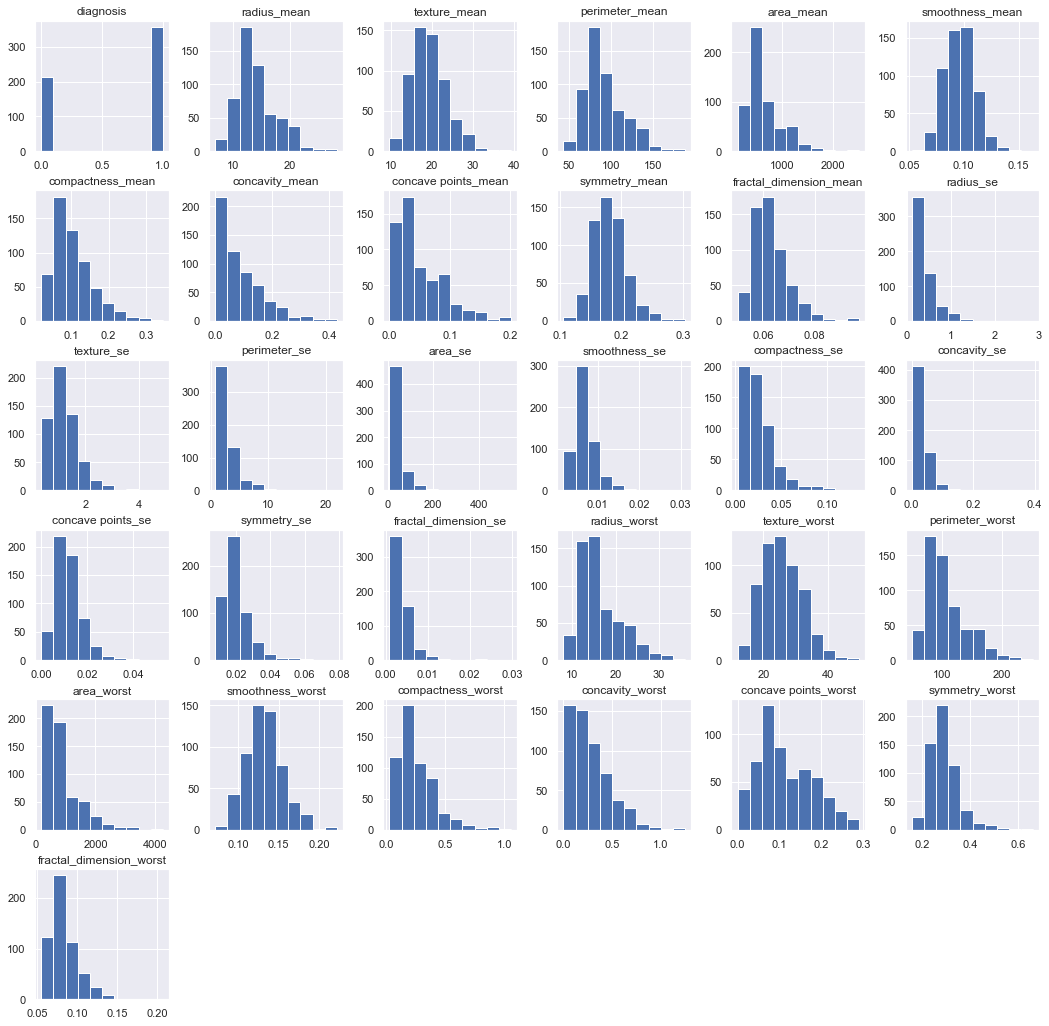

In [106]:
fig = data.hist(figsize = (18,18))


In [107]:
list(data.columns)

['diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [108]:
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


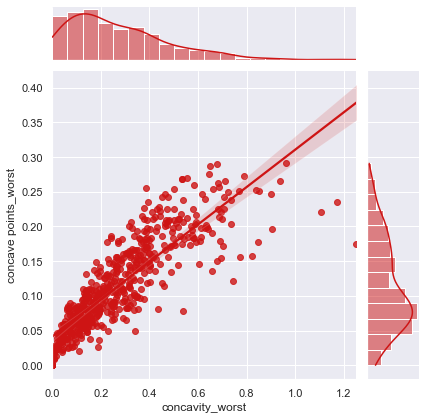

In [109]:
x = data.drop(['diagnosis'],axis = 1)
sns.jointplot(x.loc[:,'concavity_worst'], x.loc[:,'concave points_worst'], kind="reg", color="#ce1414")
x.head()

<a id='Correlation'></a>
## 3.7 Correlation

<table align="left">
    <tr>
        <td width="8%">
            <img src="key.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b> Call the corr() function which will return the correlation matrix of numeric variables</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [110]:
# check correlation
data_num = data.drop('diagnosis', axis=1)
corr = data_num.corr()
corr

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


<AxesSubplot:>

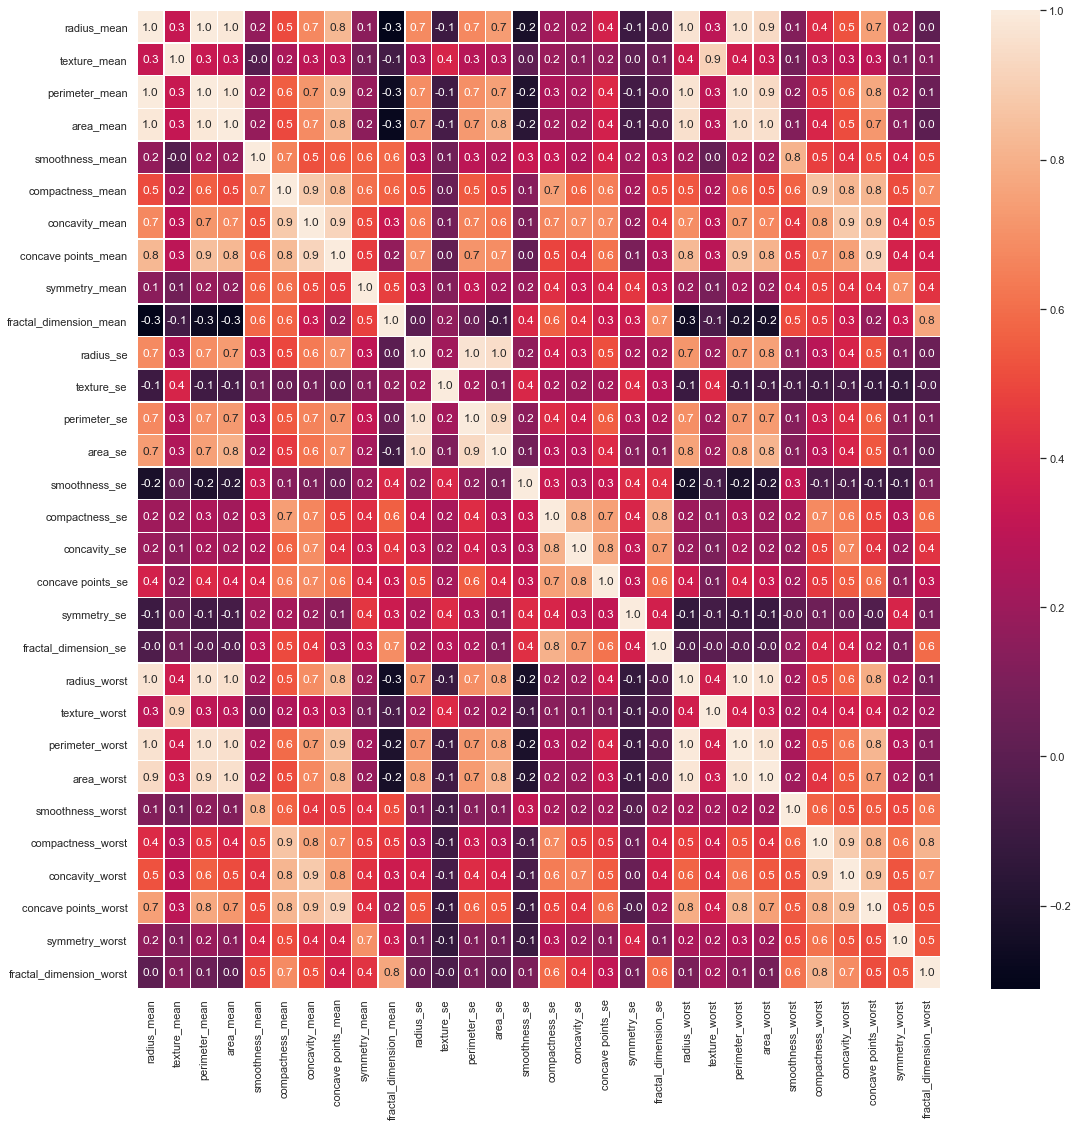

In [111]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(data_num.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

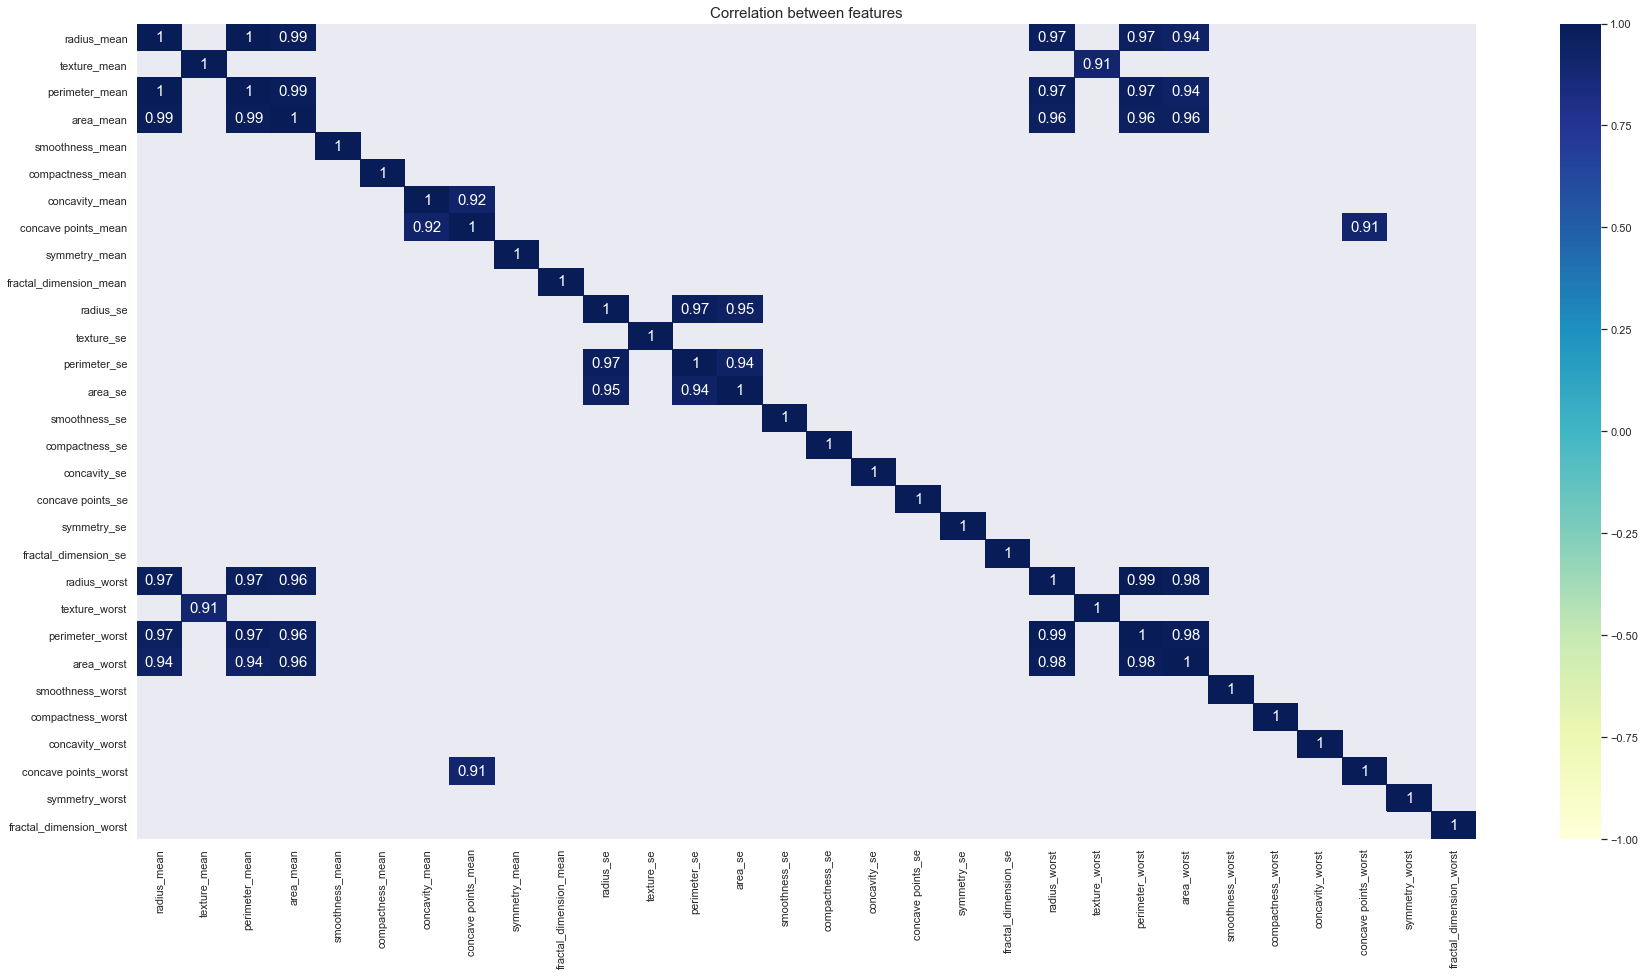

In [112]:
# ploting correlation plot

# set the figure size
plt.figure(figsize=(30, 15))

# plotting the heat map
# corr: give the correlation matrix
# cmap: colour code used for plotting
# vmax: gives maximum range of values for the chart
# vmin: gives minimum range of values for the chart
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
# set condition to get a strong correlation between the variables
sns.heatmap(corr[(corr >= 0.9) | (corr <= -0.9)], 
            cmap='YlGnBu', vmax=1.0, vmin=-1.0,
            annot=True, annot_kws={"size": 15})

# set the title
# fontsize=30: set the font size of the title
plt.title('Correlation between features', fontsize=15)
# display the plot
plt.show()

<table align="left">
    <tr>
        <td width="8%">
            <img src="note.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
<b>By looking at the correlation matrix we can see that variables 'perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst','compactness_se','concave points_se','texture_worst','area_worst' have a strong positive correlation with each other. These feature pairs are strongly correlated to each other. Ideally, we should not select these features together for training the model. </b>     </font>
            </div>
        </td>
    </tr>
</table>

In [113]:
drop_list = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst','compactness_se','concave points_se','texture_worst','area_worst']
data_cleaned = data.drop(drop_list,axis = 1 )        
data_cleaned.head()

,diagnosis,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,0,10.38,1001.0,0.11840,0.3001,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.1622,0.7119,0.4601,0.11890
1,0,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.1238,0.2416,0.2750,0.08902
2,0,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.1444,0.4504,0.3613,0.08758
3,0,20.38,386.1,0.14250,0.2414,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.2098,0.6869,0.6638,0.17300
4,0,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.1374,0.4000,0.2364,0.07678


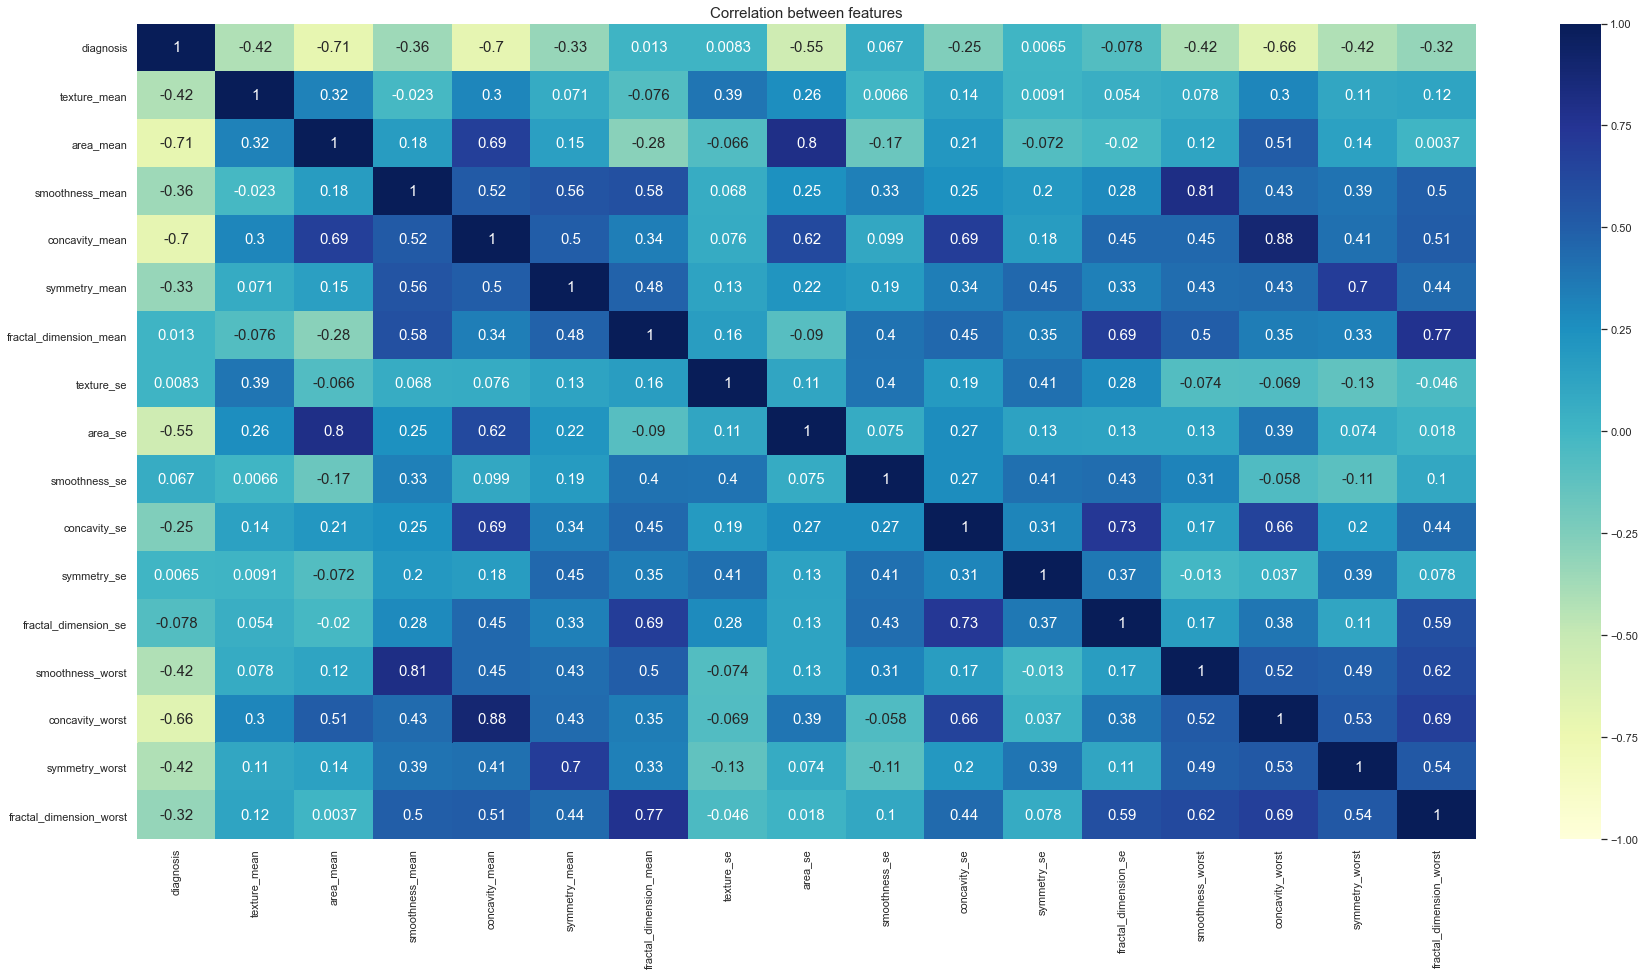

In [114]:
# ploting correlation plot

# set the figure size
plt.figure(figsize=(30, 15))

# plotting the heat map
# corr: give the correlation matrix
# cmap: colour code used for plotting
# vmax: gives maximum range of values for the chart
# vmin: gives minimum range of values for the chart
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
# set condition to get a strong correlation between the variables
sns.heatmap(data_cleaned.corr(), 
            cmap='YlGnBu', vmax=1.0, vmin=-1.0,
            annot=True, annot_kws={"size": 15})

# set the title
# fontsize=30: set the font size of the title
plt.title('Correlation between features', fontsize=15)
# display the plot
plt.show()

In [115]:
# print the name of columns
data_cleaned.columns

Index(['diagnosis', 'texture_mean', 'area_mean', 'smoothness_mean',
       'concavity_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'texture_se', 'area_se', 'smoothness_se', 'concavity_se', 'symmetry_se',
       'fractal_dimension_se', 'smoothness_worst', 'concavity_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

<AxesSubplot:>

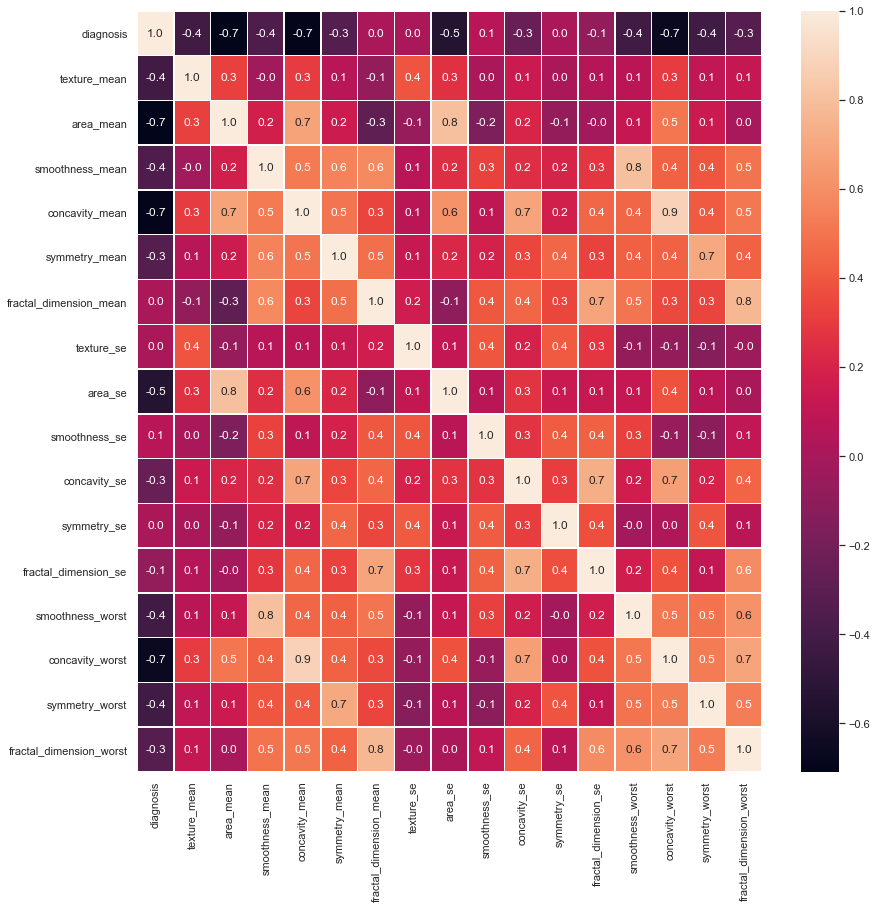

In [116]:
#correlation map
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(data_cleaned.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

<a id="feature_selection"> </a>
## 3.8 Feature Selection

In [117]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
x = data_cleaned.drop(['diagnosis'],axis = 1)
y = data_cleaned['diagnosis']
select_feature = SelectKBest(chi2, k=5).fit(x,y)
X = select_feature.transform(x)
X # Selected features are 'texture_mean' , 'area_mean','concavity_mean' , 'area_se' , 'concavity_worst' 

array([[1.038e+01, 1.001e+03, 3.001e-01, 1.534e+02, 7.119e-01],
       [1.777e+01, 1.326e+03, 8.690e-02, 7.408e+01, 2.416e-01],
       [2.125e+01, 1.203e+03, 1.974e-01, 9.403e+01, 4.504e-01],
       ...,
       [2.808e+01, 8.581e+02, 9.251e-02, 4.855e+01, 3.403e-01],
       [2.933e+01, 1.265e+03, 3.514e-01, 8.622e+01, 9.387e-01],
       [2.454e+01, 1.810e+02, 0.000e+00, 1.915e+01, 0.000e+00]])

In [118]:
print(select_feature)

SelectKBest(k=5, score_func=<function chi2 at 0x7fb642a30550>)


In [119]:
x.head()

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,10.38,1001.0,0.11840,0.3001,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.1622,0.7119,0.4601,0.11890
1,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.1238,0.2416,0.2750,0.08902
2,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.1444,0.4504,0.3613,0.08758
3,20.38,386.1,0.14250,0.2414,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.2098,0.6869,0.6638,0.17300
4,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.1374,0.4000,0.2364,0.07678


In [120]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: diagnosis, dtype: int64

<table align="left">
    <tr>
        <td width="8%">
            <img src="note.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b>We used Chi-squared test to select top  5 best features from the cleaned data so as to increase model performance<br><br>
 </b>
                </font>
            </div>
        </td>
    </tr>
</table>



<a id="Ensemble_learning"> </a>
## 4. Ensemble Learning

<a id="meta_estimator"> </a>
## 4.1 Bagging meta-estimator

<table align="left">
    <tr>
        <td width="8%">
            <img src="key.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b> Now we build a ensemble model using Bagging meta-estimator. We start with our data set gradually proceeding with our analysis<br><br>
                        In order to build a  ensemble model using Bagging meta-estimator, we do the following:<br>
                        1. Split the dataset set <br>
                        2. Build the model<br>
                        3. Predict the values<br>
                        4. Compute the accuracy measures<br>
                        5. Tabulate the results <br>
                      </b>
                </font>
            </div>
        </td>
    </tr>
</table>

**1. Split the dataset set**

In [121]:
from sklearn.model_selection import train_test_split
# let us now split the dataset into train & test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=10)

# print the shape of 'x_train'
print("X_train ",X_train.shape)

# print the shape of 'x_test'
print("X_test ",X_test.shape)

# print the shape of 'y_train'
print("y_train ",y_train.shape)

# print the shape of 'y_test'
print("y_test ",y_test.shape)

X_train  (398, 5)
X_test  (171, 5)
y_train  (398,)
y_test  (171,)


**2. Build the model**

In [122]:
from sklearn.ensemble import BaggingClassifier
from sklearn import tree

# build the model
meta_estimator = BaggingClassifier(tree.DecisionTreeClassifier(random_state=10))

# fit the model
meta_estimator.fit(X_train, y_train)


BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=10))

**3. Predict the values**

In [123]:
# predict the values
y_pred = meta_estimator.predict(X_test)

**4. Compute accuracy measures**

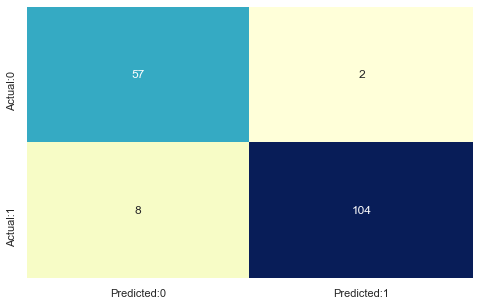

In [124]:
from sklearn.metrics import confusion_matrix
# compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# label the confusion matrix  
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])

# set sizeof the plot
plt.figure(figsize = (8,5))

# plot a heatmap
# cmap: colour code used for plotting
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
# cbar=False: Whether to draw a colorbar
# fmt: string formatting code to use when adding annotations
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu", cbar=False)
plt.show()

In [125]:
   # True Negatives are denoted by 'TN'
# Actual 'O' values which are classified correctly
TN = cm[0,0]

# True Positives are denoted by 'TP'
# Actual '1' values which are classified correctly
TP = cm[1,1]

# False Negatives are denoted by 'FN'
# Actual '1' values which are classified wrongly as '0'
FN = cm[1,0]

# False Positives are denoted by 'FP'
# Actual 'O' values which are classified wrongly as '1'
FP = cm[0,1]                                                           

In [126]:
from sklearn.metrics import classification_report
# accuracy measures by classification_report()
result = classification_report(y_test,y_pred)

# print the result
print(result)

              precision    recall  f1-score   support

           0       0.88      0.97      0.92        59
           1       0.98      0.93      0.95       112

    accuracy                           0.94       171
   macro avg       0.93      0.95      0.94       171
weighted avg       0.95      0.94      0.94       171



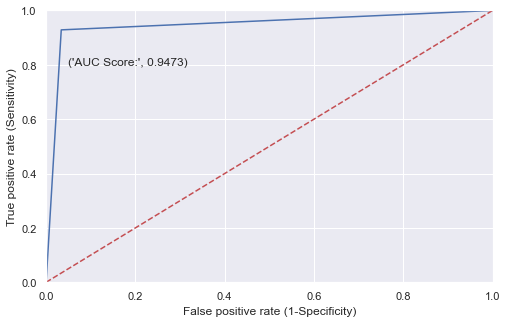

In [127]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# set the figure size
plt.rcParams['figure.figsize']=(8,5)

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# plot the ROC curve
plt.plot(fpr,tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add the AUC score
plt.text(x = 0.05, y = 0.8, s =('AUC Score:', round(roc_auc_score(y_test, y_pred),4)))

# name the plot, and both axes
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')

# plot the grid
plt.grid(True)

<table align="left">
    <tr>
        <td width="8%">
            <img src="note.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b>The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner)<br><br>
We see our classifier is away from the dotted line; which means the meta-estimator model is a good classifier  </b>
                </font>
            </div>
        </td>
    </tr>
</table>



**5. Tabulate the results**

In [128]:
from sklearn import metrics
# create the result table for all accuracy scores
# Accuracy measures considered for model comparision are 'Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score', 'f1 - score'

# create a list of column names
cols = ['Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','f1-score']

# creating an empty dataframe of the colums
result_tabulation = pd.DataFrame(columns = cols)

# compiling the required information
Bagging_Meta_estimator = pd.Series({'Model': "Bagging Meta-estimator",
                     'AUC Score' : metrics.roc_auc_score(y_test, y_pred),
                 'Precision Score': metrics.precision_score(y_test, y_pred),
                 'Recall Score': metrics.recall_score(y_test, y_pred),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                  'f1-score':metrics.f1_score(y_test, y_pred)})



# appending our result table
result_tabulation = result_tabulation.append(Bagging_Meta_estimator , ignore_index = True)

# view the result table
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,Bagging Meta-estimator,0.947337,0.981132,0.928571,0.94152,0.954128


<a id="AdaBoost"> </a>
## 4.2 AdaBoost

<table align="left">
    <tr>
        <td width="8%">
            <img src="key.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b> Now we build a ensemble model using AdaBoost. We start with our data set gradually proceeding with our analysis<br><br>
                        In order to build a  model using AdaBoost, we do the following:<br>
                        1. Build the model<br>
                        2. Predict the values<br>
                        3. Compute the accuracy measures<br>
                        4. Tabulate the results <br>
                      </b>
                </font>
            </div>
        </td>
    </tr>
</table>

**1. Build the model**

In [129]:
from sklearn.ensemble import AdaBoostClassifier

# build the model
adaboost = AdaBoostClassifier(random_state=15)
# fit the model
adaboost.fit(X_train, y_train)




AdaBoostClassifier(random_state=15)

**2. Do predictions on the test set**

In [130]:
# predict the values
y_pred_adaboost  = adaboost.predict(X_test)

Before we compute the accuracy measures, let us plot the confusion matrix.

**3. Compute accuracy measures**

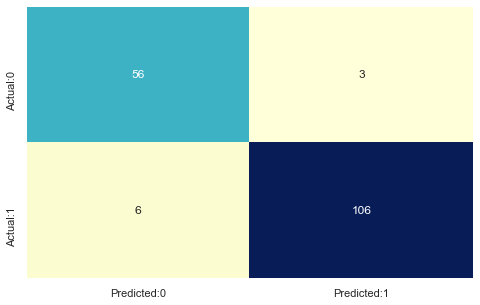

In [131]:
# compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_adaboost)

# label the confusion matrix  
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])

# set sizeof the plot
plt.figure(figsize = (8,5))

# plot a heatmap
# cmap: colour code used for plotting
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
# cbar=False: Whether to draw a colorbar
# fmt: string formatting code to use when adding annotations
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu", cbar=False)
plt.show()

In [132]:
# True Negatives are denoted by 'TN'
# Actual 'O' values which are classified correctly
TN = cm[0,0]

# True Positives are denoted by 'TP'
# Actual '1' values which are classified correctly
TP = cm[1,1]

# False Negatives are denoted by 'FN'
# Actual '1' values which are classified wrongly as '0'
FN = cm[1,0]

# False Positives are denoted by 'FP'
# Actual 'O' values which are classified wrongly as '1'
FP = cm[0,1]                                                           

In [133]:
# accuracy measures by classification_report()
result = classification_report(y_test, y_pred_adaboost)

# print the result
print(result)

              precision    recall  f1-score   support

           0       0.90      0.95      0.93        59
           1       0.97      0.95      0.96       112

    accuracy                           0.95       171
   macro avg       0.94      0.95      0.94       171
weighted avg       0.95      0.95      0.95       171



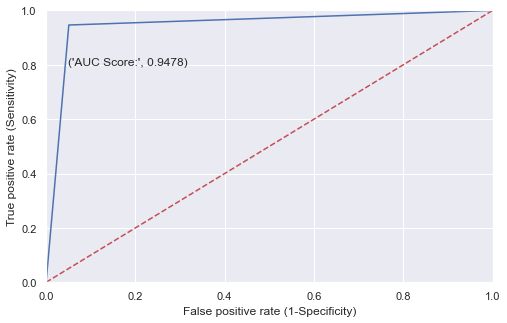

In [134]:
# set the figure size
plt.rcParams['figure.figsize']=(8,5)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_adaboost)

# plot the ROC curve
plt.plot(fpr,tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add the AUC score
plt.text(x = 0.05, y = 0.8, s =('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_adaboost),4)))

# name the plot, and both axes
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')

# plot the grid
plt.grid(True)

<table align="left">
    <tr>
        <td width="8%">
            <img src="note.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b>The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner)<br><br>
We see our classifier (Adaboost) is far away from the dotted line; which means that Adaboost is a very good classifier  </b>
                </font>
            </div>
        </td>
    </tr>
</table>

**4. Tabulate the results**

In [135]:
# create the result table for all accuracy scores
# Accuracy measures considered for model comparision are 'Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score', 'f1 - score'

# create a list of column names


# compiling the required information
adaboost_metrics = pd.Series({'Model': "AdaBoost",
                     'AUC Score' : metrics.roc_auc_score(y_test, y_pred_adaboost),
                 'Precision Score': metrics.precision_score(y_test, y_pred_adaboost),
                 'Recall Score': metrics.recall_score(y_test, y_pred_adaboost),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred_adaboost),
                  'f1-score':metrics.f1_score(y_test, y_pred_adaboost)})



# appending our result table
result_tabulation = result_tabulation.append(adaboost_metrics , ignore_index = True)

# view the result table
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,Bagging Meta-estimator,0.947337,0.981132,0.928571,0.941520,0.954128
1,AdaBoost,0.947791,0.972477,0.946429,0.947368,0.959276


<table align="left">
    <tr>
        <td width="8%">
            <img src="note.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b>It can be seen from the result tabulation, that all of the accuracy measures for both the models are not very good. However,  for term deposit subscription prediction, type 2 errors are costly. The type 2 error for both the above models are high. Hence, this may not be the best model for the required prediction.  </b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id="XGBM"> </a>
## 4.3 XGBM

<table align="left">
    <tr>
        <td width="8%">
            <img src="key.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b> Now we build a Ensemble learning model using XGB(extreme Gradient Boosting). We start with our original data set gradually proceeding with our analysis<br><br>
                        In order to build a model using XGBM, we do the following:<br>
                        1. Build the model<br>
                        2. Predict the values<br>
                        3. Compute the accuracy measures<br>
                        4. Tabulate the results <br>
                      </b>
                </font>
            </div>
        </td>
    </tr>
</table>

**1. Build the model**

In [140]:
#import xgboost classifier
from xgboost.sklearn import XGBClassifier

ImportError: cannot import name 'CUDF_concat' from 'xgboost.compat' (/Users/aniket/opt/anaconda3/lib/python3.8/site-packages/xgboost/compat.py)

In [139]:
#import xgboost classifier
from xgboost.sklearn import XGBClassifier

# build the model
xgbm = XGBClassifier(random_state=1,learning_rate=0.01)
# fit the model
xgbm.fit(X_train, y_train)




ImportError: cannot import name 'CUDF_concat' from 'xgboost.compat' (/Users/aniket/opt/anaconda3/lib/python3.8/site-packages/xgboost/compat.py)

**2. Predict the values for the test set**

In [ ]:
# predict the values
y_pred_xgbm  = xgbm.predict(X_test)

**3. Compute accuracy measures**

In [ ]:
# compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_xgbm)

# label the confusion matrix  
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])

# set sizeof the plot
plt.figure(figsize = (8,5))

# plot a heatmap
# cmap: colour code used for plotting
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
# cbar=False: Whether to draw a colorbar
# fmt: string formatting code to use when adding annotations
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu", cbar=False)
plt.show()

In [ ]:
# True Negatives are denoted by 'TN'
# Actual 'O' values which are classified correctly
TN = cm[0,0]

# True Positives are denoted by 'TP'
# Actual '1' values which are classified correctly
TP = cm[1,1]

# False Negatives are denoted by 'FN'
# Actual '1' values which are classified wrongly as '0'
FN = cm[1,0]

# False Positives are denoted by 'FP'
# Actual 'O' values which are classified wrongly as '1'
FP = cm[0,1]               

In [ ]:
# accuracy measures by classification_report()
result = classification_report(y_test,y_pred_xgbm)

# print the result
print(result)

In [ ]:
# set the figure size
plt.rcParams['figure.figsize']=(8,5)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_xgbm)

# plot the ROC curve
plt.plot(fpr,tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add the AUC score
plt.text(x = 0.05, y = 0.8, s =('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_xgbm),4)))

# name the plot, and both axes
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')

# plot the grid
plt.grid(True)

<table align="left">
    <tr>
        <td width="8%">
            <img src="note.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b>The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner)<br><br>
We see our classifier is not very far away from the dotted line; which means the it is not a good classifier  </b>
                </font>
            </div>
        </td>
    </tr>
</table>

**5. Tabulate the results**

In [ ]:
# create the result table for all accuracy scores
# Accuracy measures considered for model comparision are 'Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score', 'f1 - score'

# create a list of column names


# compiling the required information
xgbm_metrices = pd.Series({'Model': "XGBM",
                     'AUC Score' : metrics.roc_auc_score(y_test, y_pred_xgbm),
                 'Precision Score': metrics.precision_score(y_test, y_pred_xgbm),
                 'Recall Score': metrics.recall_score(y_test, y_pred_xgbm),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred_xgbm),

                  'f1-score':metrics.f1_score(y_test, y_pred_xgbm)})



# appending our result table
result_tabulation = result_tabulation.append(xgbm_metrices , ignore_index = True)

# view the result table
result_tabulation

<a id="model_cmp"> </a>
## 5. Model Comparision

In [ ]:
result_tabulation

<table align="left">
    <tr>
        <td width="8%">
            <img src="note.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b>It can be seen from the result tabulation, that accuracy measures for the Adaboost is better than other models. </b>
                </font>
            </div>
        </td>
    </tr>
</table>